#Importing dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/P587 DATASET.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


#Data Processing


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [4]:
df.shape


(2011, 7)

In [5]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [7]:
# Convert Date column to datetime and sort chronologically
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)

In [8]:
#missing values & dlupicate
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
#Set index using the Date column
df.set_index('Date', inplace=True)

In [11]:
# Display the cleaned data
display(df.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [12]:
# Feature Engineering

# Lag features
df['Close_Lag1'] = df['Close'].shift(1)
df['Volume_Lag1'] = df['Volume'].shift(1)

# Rolling statistics
df['Close_MA7'] = df['Close'].rolling(window=7).mean()
df['Close_MA30'] = df['Close'].rolling(window=30).mean()
df['Close_RollingStd'] = df['Close'].rolling(window=7).std()

# Returns
df['Daily_Return'] = (df['Close'] - df['Open']) / df['Open']
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))

# Date-based features
df['Day_of_Week'] = df.index.dayofweek
df['Month'] = df.index.month
df['Quarter'] = df.index.quarter
df['Year'] = df.index.year
df['Is_Month_End'] = df.index.is_month_end
df['Is_Month_Start'] = df.index.is_month_start
df['Is_Weekend'] = (df['Day_of_Week'] >= 5).astype(int) # 5 and 6 are Saturday and Sunday

In [13]:
# Scaling (for ML models) - Example using MinMaxScaler on 'Close' and 'Volume'
from sklearn.preprocessing import MinMaxScaler

# Select features to scale (excluding NaN values introduced by lagging/rolling)
features_to_scale = ['Close', 'Volume', 'Close_Lag1', 'Volume_Lag1', 'Close_MA7', 'Close_MA30', 'Close_RollingStd', 'Daily_Return', 'Log_Return']

# Drop rows with NaN values that resulted from feature engineering
df_scaled = df.dropna().copy()

scaler = MinMaxScaler()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])

# Display the DataFrame with new features and scaled data
display(df_scaled.head())

,Open,High,Low,Close,Adj Close,Volume,Close_Lag1,Volume_Lag1,Close_MA7,Close_MA30,Close_RollingStd,Daily_Return,Log_Return,Day_of_Week,Month,Quarter,Year,Is_Month_End,Is_Month_Start,Is_Weekend
Date,,,,,,,,,,,,,,,,,,,,
2012-02-14,72.094284,72.794289,71.714287,0.072074,62.892056,0.284082,0.068384,0.322980,0.053993,0.016532,0.246709,0.494756,0.670524,1,2,1,2012,False,False,0
2012-02-15,73.465714,75.184288,70.984283,0.064929,61.436600,1.000000,0.072570,0.284082,0.057005,0.018473,0.198777,0.222260,0.500078,2,2,1,2012,False,False,0
2012-02-16,70.214287,72.127144,69.518570,0.067680,61.997032,0.615541,0.065375,1.000000,0.059988,0.020466,0.137458,0.574859,0.649891,3,2,1,2012,False,False,0
2012-02-17,71.872856,72.538574,71.471428,0.067626,61.985954,0.335707,0.068146,0.615541,0.062262,0.022354,0.063571,0.419872,0.607198,4,2,1,2012,False,False,0
2012-02-21,72.411430,73.550003,72.017143,0.075340,63.557446,0.383486,0.068091,0.335707,0.064200,0.024429,0.084691,0.535282,0.723449,1,2,1,2012,False,False,0


#EDA


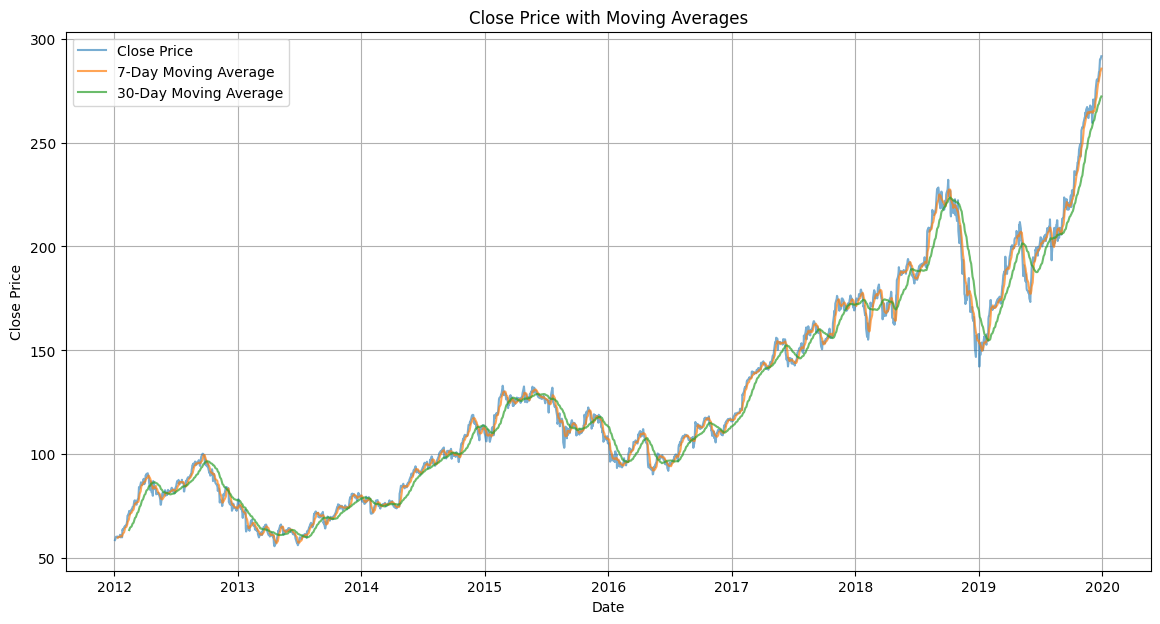

In [14]:
# Plot Close price with moving averages
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', alpha=0.6)
plt.plot(df['Close_MA7'], label='7-Day Moving Average', alpha=0.7)
plt.plot(df['Close_MA30'], label='30-Day Moving Average', alpha=0.7)
plt.title('Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

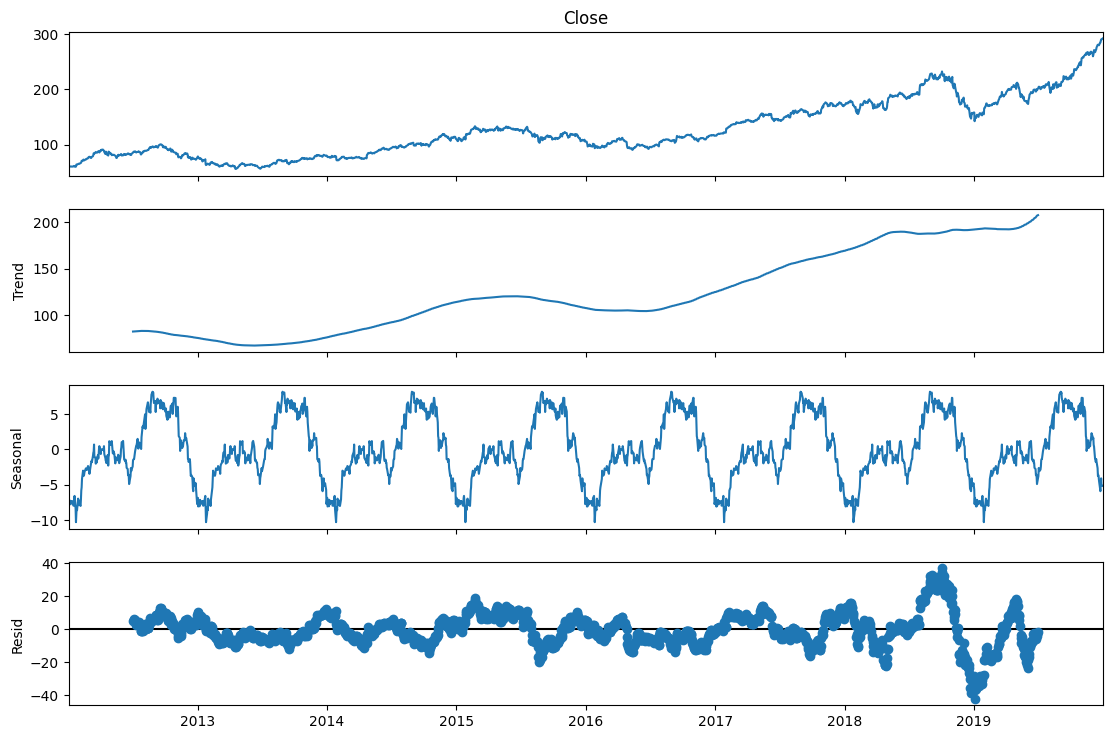

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition on the 'Close' price
decomposition = seasonal_decompose(df['Close'], model='additive', period=252) # Assuming daily data, period=252 for annual seasonality

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

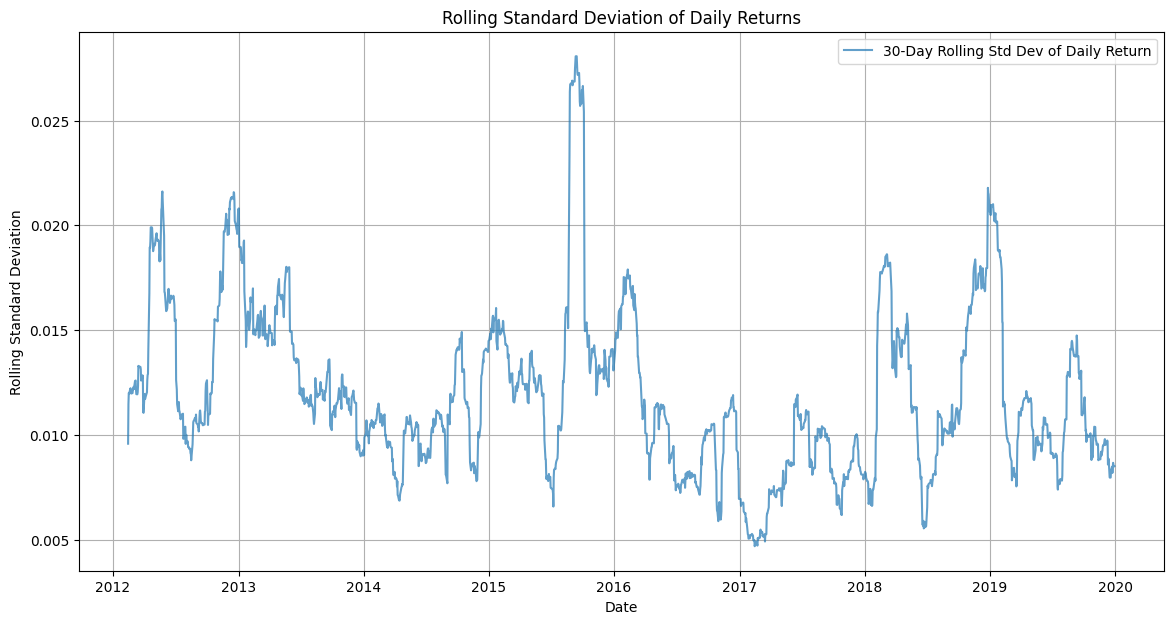

In [16]:
# Volatility Analysis - Plotting Rolling Standard Deviation of Returns
plt.figure(figsize=(14, 7))

# Calculate rolling standard deviation of Daily_Return
df['Daily_Return_RollingStd'] = df['Daily_Return'].rolling(window=30).std() # Using a 30-day rolling window as an example

plt.plot(df['Daily_Return_RollingStd'], label='30-Day Rolling Std Dev of Daily Return', alpha=0.7)

plt.title('Rolling Standard Deviation of Daily Returns')
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

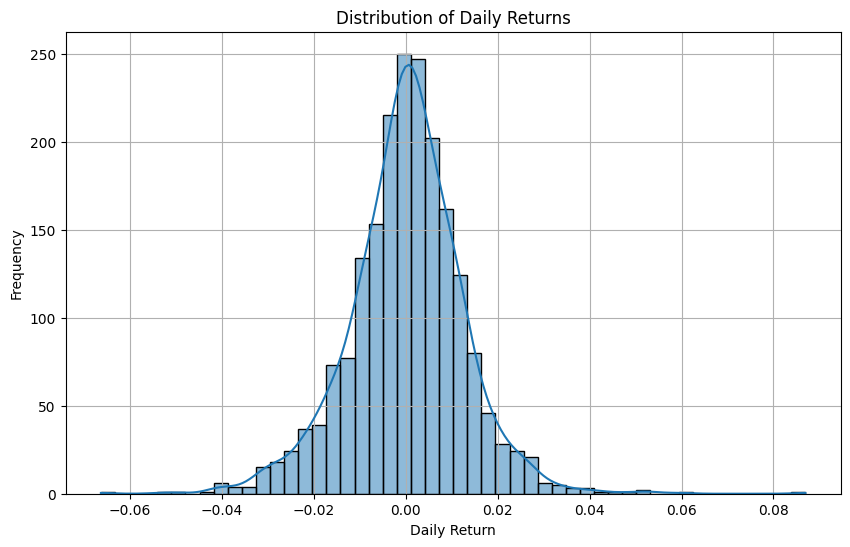

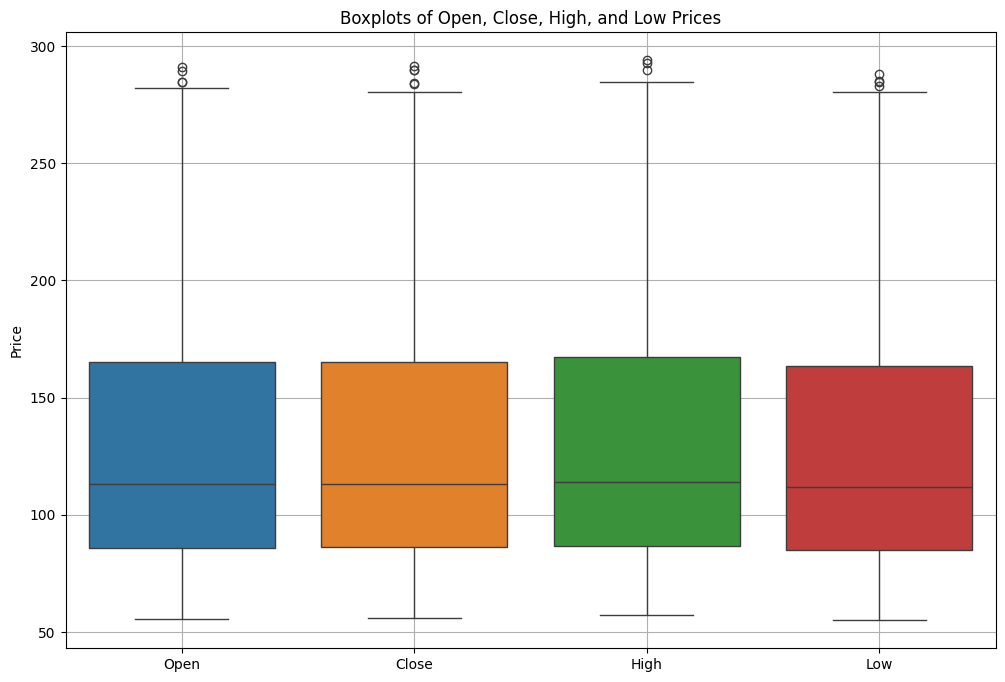

In [17]:
# Distribution Analysis

# Histogram of daily returns
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily_Return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplots for Open, Close, High, Low
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Open', 'Close', 'High', 'Low']])
plt.title('Boxplots of Open, Close, High, and Low Prices')
plt.ylabel('Price')
plt.grid(True)
plt.show()

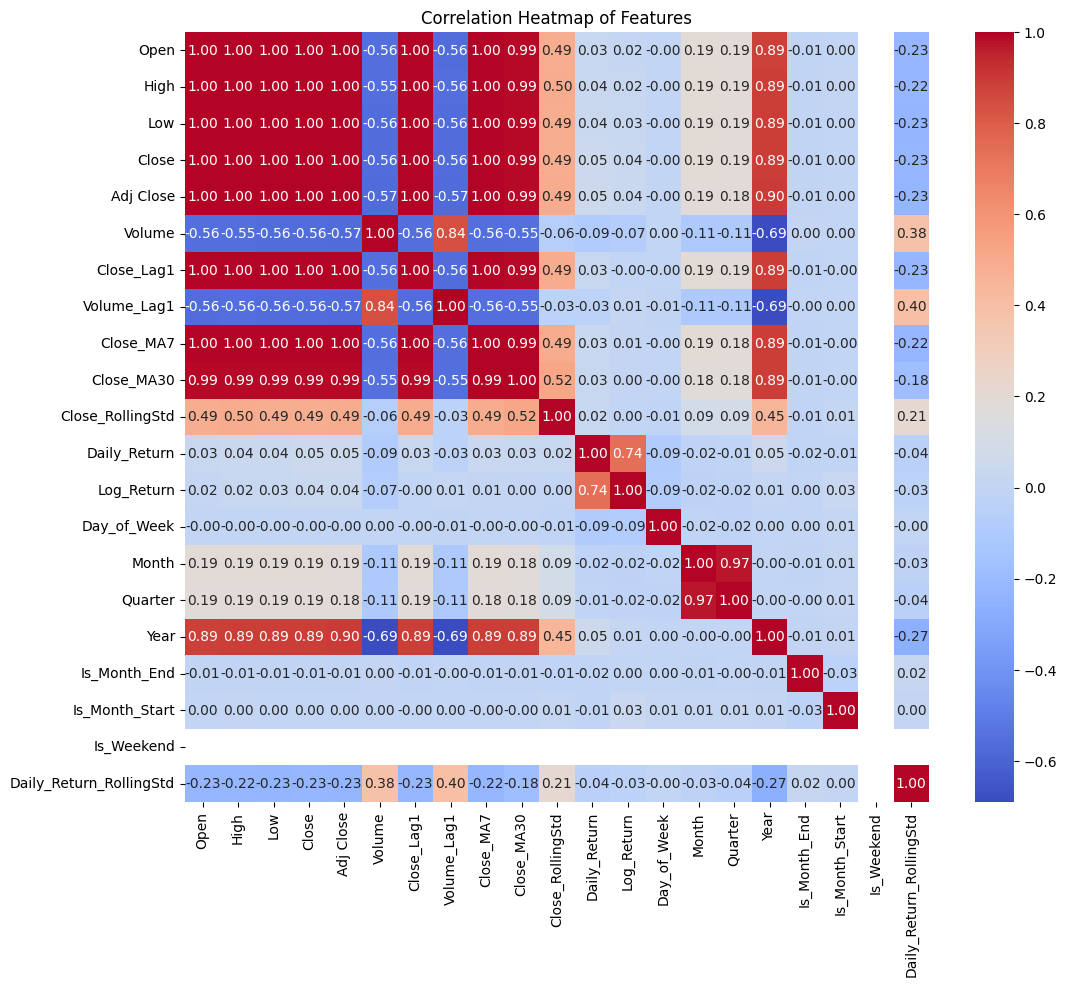


Correlation between Volume and Close Price: -0.56
Correlation between Volume and Open Price: -0.56


In [18]:
# Correlation Analysis - Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

# Check specific correlations (e.g., Volume with Close)
correlation_volume_close = df['Volume'].corr(df['Close'])
print(f"\nCorrelation between Volume and Close Price: {correlation_volume_close:.2f}")

# You can check correlations with other price columns as well
correlation_volume_open = df['Volume'].corr(df['Open'])
print(f"Correlation between Volume and Open Price: {correlation_volume_open:.2f}")

In [19]:
# Time-Based Grouping
# Group by Year and calculate average daily return
yearly_avg_return = df.groupby('Year')['Daily_Return'].mean()
print("Average Daily Return by Year:")
display(yearly_avg_return)
# Group by Month and calculate average daily return across all years
monthly_avg_return = df.groupby('Month')['Daily_Return'].mean()
print("\nAverage Daily Return by Month (across all years):")
display(monthly_avg_return)
# Group by Year and Month to see monthly average returns per year
monthly_yearly_avg_return = df.groupby(['Year', 'Month'])['Daily_Return'].mean()
print("\nAverage Daily Return by Year and Month:")
display(monthly_yearly_avg_return)

Average Daily Return by Year:


,Daily_Return
Year,
2012,-0.000816
2013,-0.000944
2014,0.000565
2015,-0.001015
2016,0.000942
2017,0.000842
2018,-0.000262
2019,0.001826



Average Daily Return by Month (across all years):


,Daily_Return
Month,
1,-0.000663
2,0.001989
3,0.000055
4,-0.000364
5,0.001130
6,-0.001061
7,0.000844
8,0.001552
9,-0.001168



Average Daily Return by Year and Month:


Year  Month
2012  1       -0.000361
      2        0.005673
      3        0.001192
      4       -0.005767
      5       -0.001830
                 ...   
2019  8       -0.001307
      9        0.001271
      10       0.001555
      11       0.003245
      12       0.003671
Name: Daily_Return, Length: 96, dtype: float64

/usr/local/lib/python3.12/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


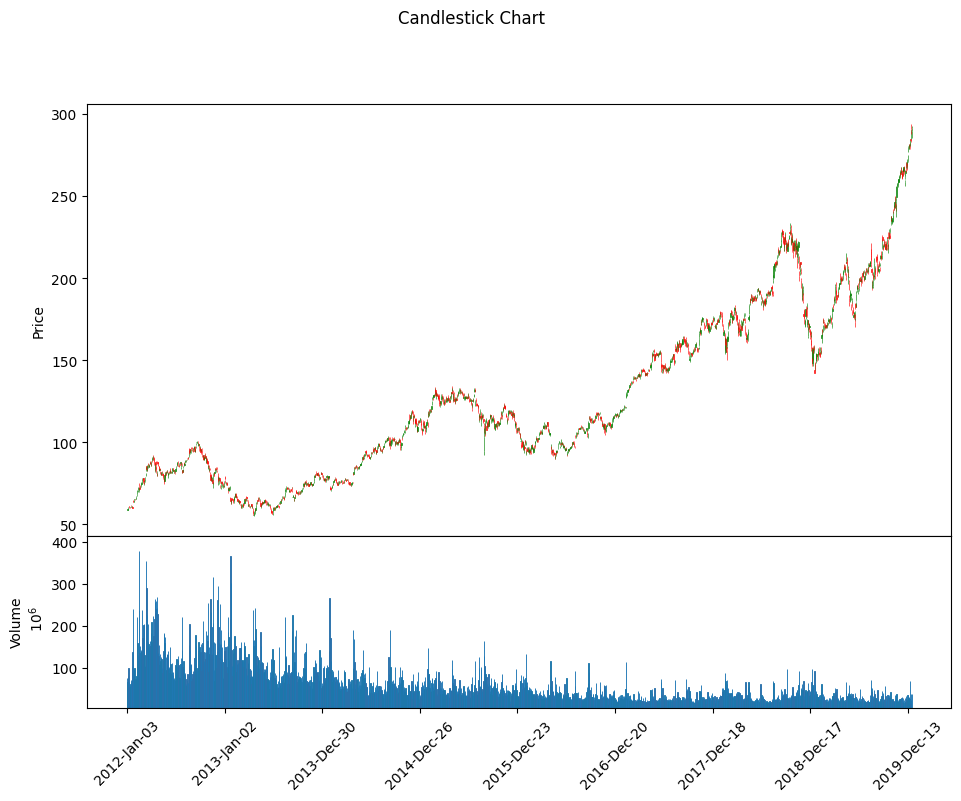

In [23]:
import mplfinance as mpf

# Candlestick Chart using mplfinance
# Create a custom style (optional)
mc = mpf.make_marketcolors(up='green', down='red', inherit=True)
s = mpf.make_mpf_style(marketcolors=mc)

# Plot the candlestick chart
# We need Open, High, Low, Close, and Volume. Ensure the index is datetime.
# Since we set the index to Date earlier, this is fine.
mpf.plot(df, type='candle', style=s,
         title='Candlestick Chart',
         ylabel='Price',
         ylabel_lower='Volume',
         volume=True,
         figscale=1.5)

In [22]:
%pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.1 MB/s eta 0:00:00


### Volume vs Price Movement Analysis

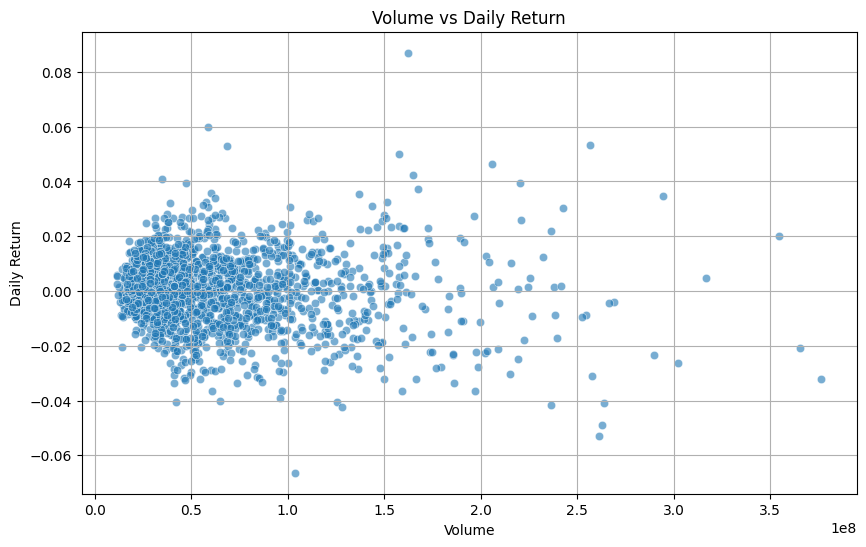

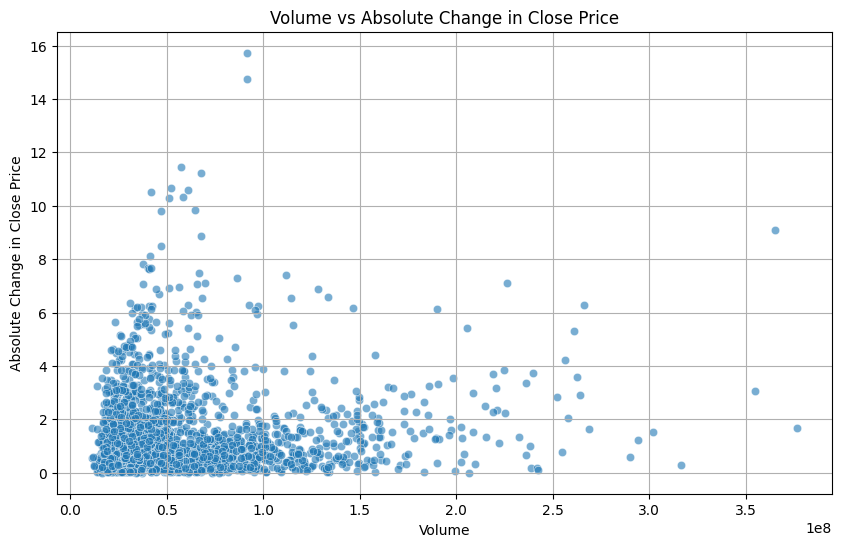

In [24]:
# Scatter plot of Volume vs Daily_Return (Close change relative to Open)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Volume'], y=df['Daily_Return'], alpha=0.6)
plt.title('Volume vs Daily Return')
plt.xlabel('Volume')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()

# Scatter plot of Volume vs Absolute Change in Close Price
df['Close_Change'] = df['Close'] - df['Close'].shift(1)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Volume'], y=df['Close_Change'].abs(), alpha=0.6)
plt.title('Volume vs Absolute Change in Close Price')
plt.xlabel('Volume')
plt.ylabel('Absolute Change in Close Price')
plt.grid(True)
plt.show()

### Detecting Unusual Trading Activity

Unusual trading activity can be detected using various methods. Some common approaches include:

1.  **Statistical Thresholds:** Identify days where volume or price changes exceed a certain number of standard deviations from the mean.
2.  **Rolling Percentiles:** Look for data points that fall outside a certain percentile range within a rolling window.
3.  **Machine Learning Models:** Use anomaly detection algorithms (e.g., Isolation Forest, One-Class SVM) to identify outliers.

Let me know if you'd like to implement any of these methods to detect unusual trading activity.

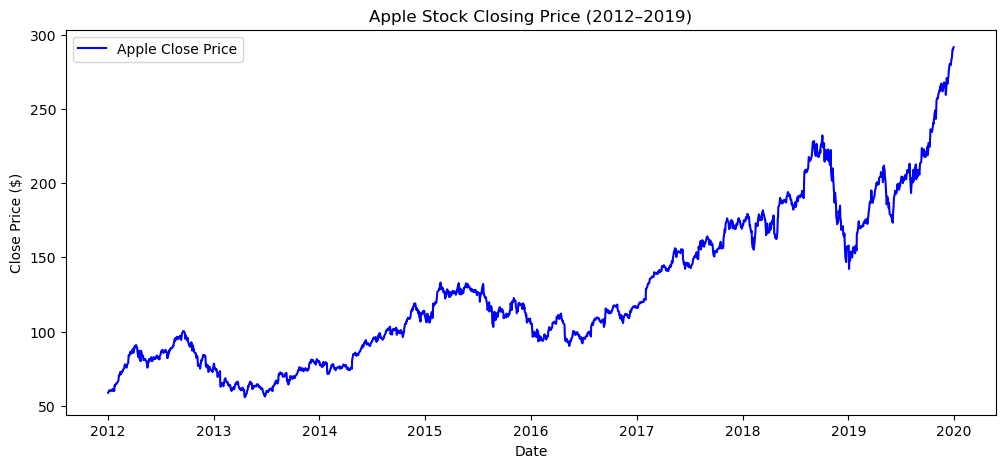

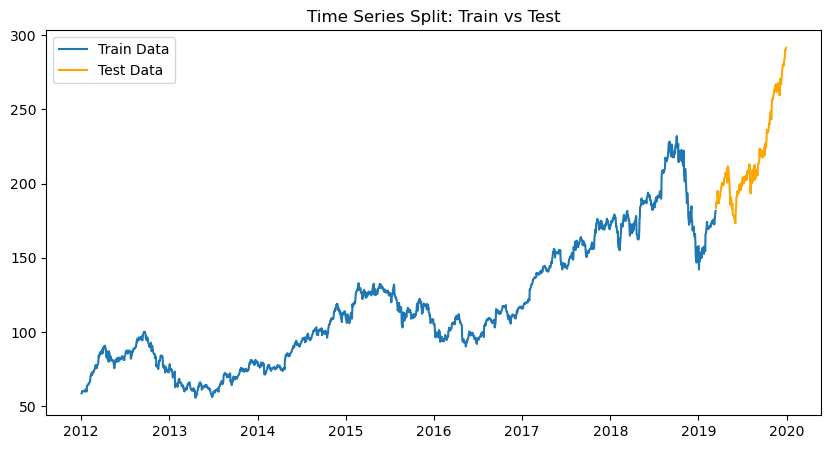

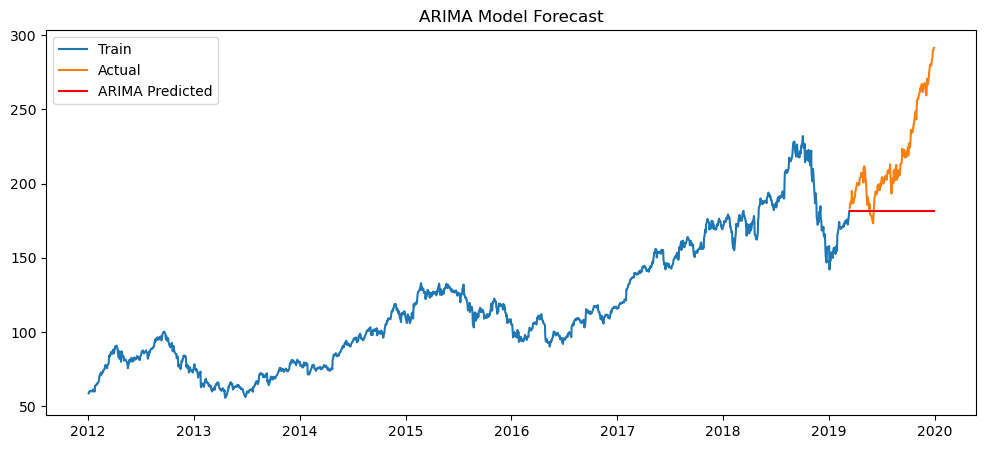

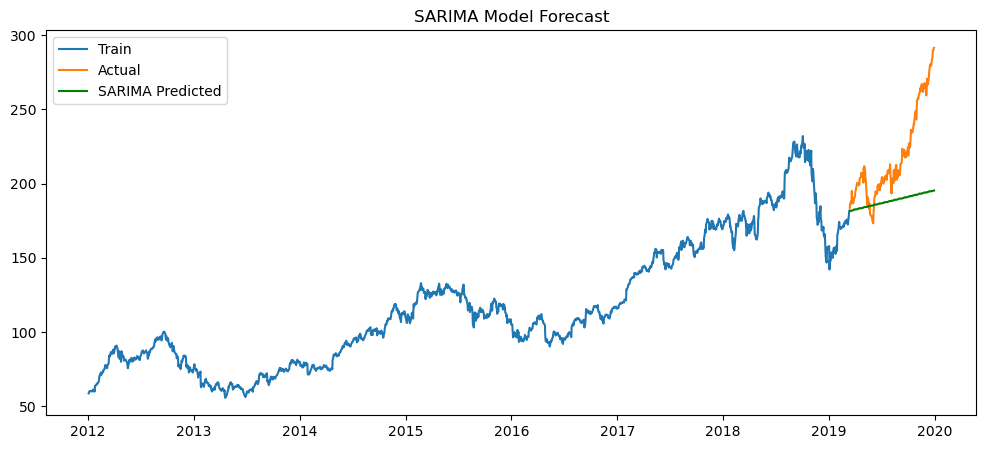

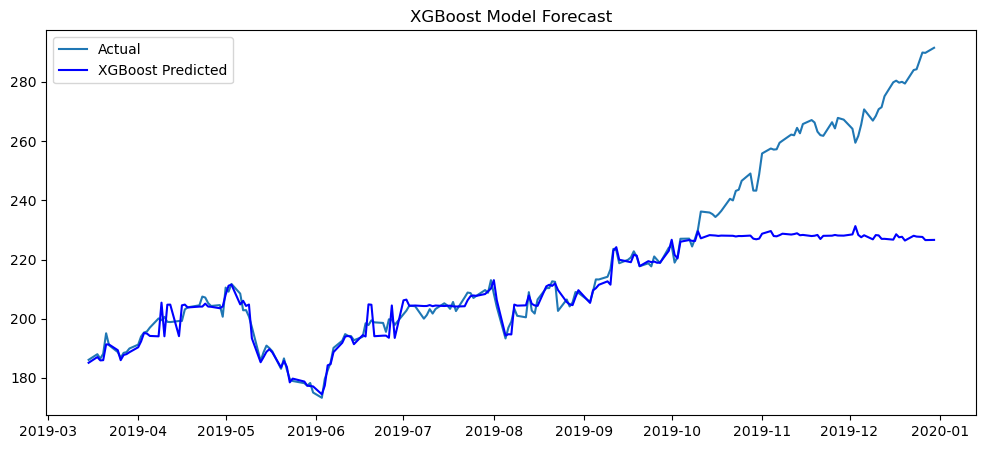

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step


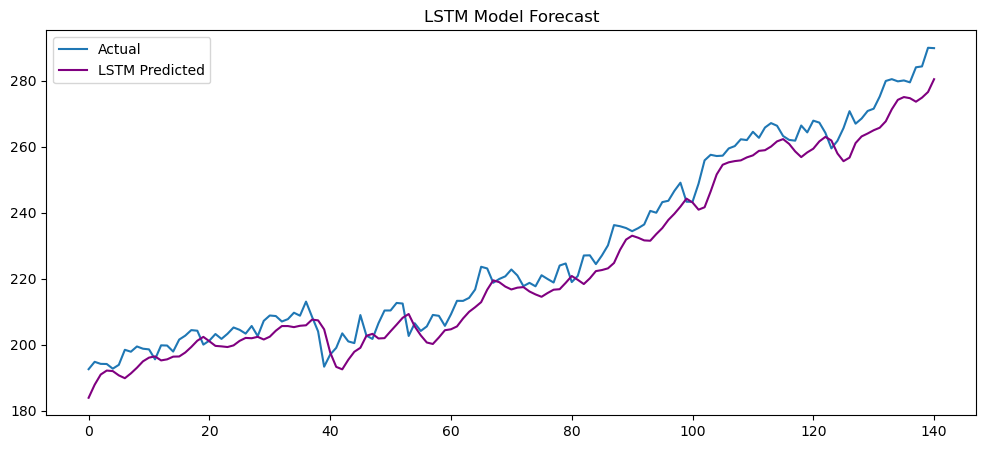


📊 Model Performance Comparison:



,Model,MSE,MAE,RMSE,R²
0,ARIMA,2214.8823,37.0377,47.0625,-1.5557
1,SARIMA,1562.7517,30.4723,39.5317,-0.8032
2,XGBoost,376.3564,10.5462,19.3999,0.5649
3,LSTM,36.4487,5.1515,6.0373,0.9539



🏆 Best Model: LSTM


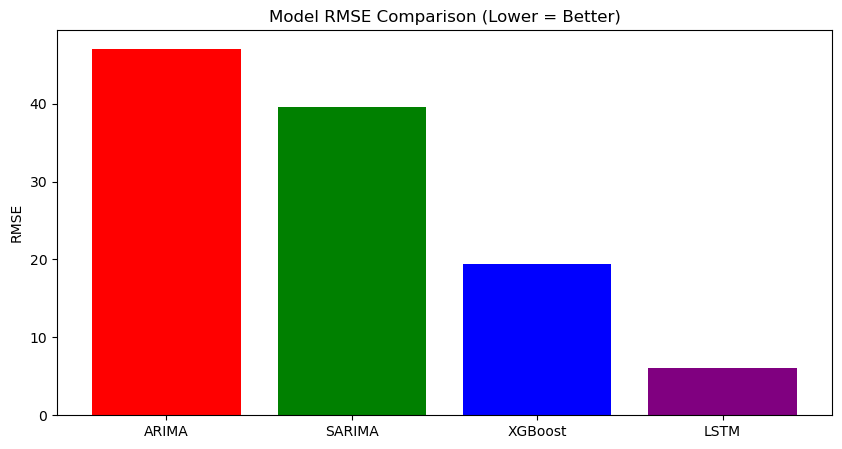

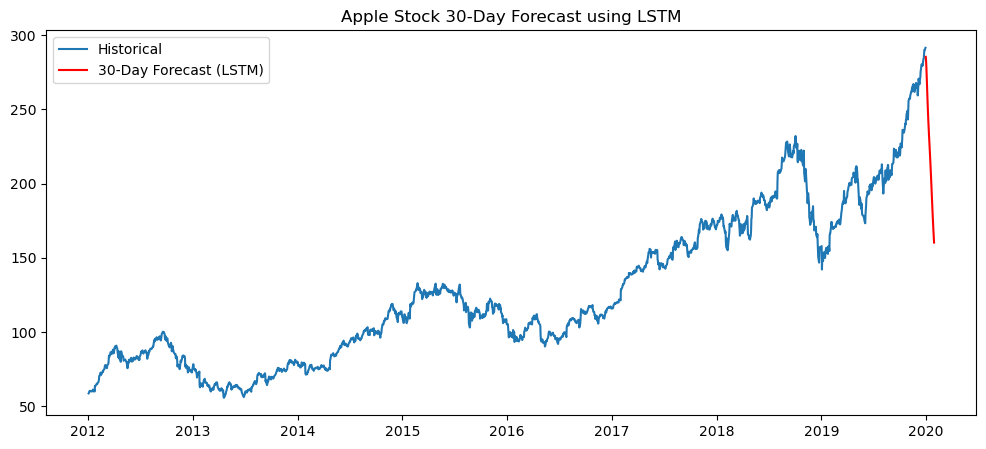


📅 Next 30-Day Forecast:


,Predicted_Close
Date,
2019-12-31,285.407654
2020-01-01,283.162689
2020-01-02,279.031128
2020-01-03,273.952332
2020-01-04,268.402710
2020-01-05,262.705536
2020-01-06,257.102722
2020-01-07,251.761749
2020-01-08,246.773682


In [5]:
# ----------------------------------------------------------
# 📈 APPLE STOCK PRICE PREDICTION – FINAL FIXED VERSION (NO ERRORS)
# ----------------------------------------------------------

# ✅ Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

# Deep Learning (LSTM)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# ----------------------------------------------------------
# STEP 1: Load and Prepare Dataset
# ----------------------------------------------------------
df = pd.read_csv("P587 DATASET.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df.set_index('Date', inplace=True)
df = df.fillna(method='ffill')

plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='Apple Close Price', color='blue')
plt.title('Apple Stock Closing Price (2012–2019)')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.show()

# ----------------------------------------------------------
# STEP 2: Time Series Split (90% train, 10% test)
# ----------------------------------------------------------
train_size = int(len(df) * 0.9)
train, test = df['Close'][:train_size], df['Close'][train_size:]

plt.figure(figsize=(10,5))
plt.plot(train, label='Train Data')
plt.plot(test, label='Test Data', color='orange')
plt.title('Time Series Split: Train vs Test')
plt.legend()
plt.show()

# ----------------------------------------------------------
# STEP 3: ARIMA MODEL
# ----------------------------------------------------------
arima_model = ARIMA(train, order=(5,1,0))
arima_fit = arima_model.fit()
arima_pred = arima_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
arima_pred.index = test.index

mse_arima = mean_squared_error(test, arima_pred)
mae_arima = mean_absolute_error(test, arima_pred)
rmse_arima = sqrt(mse_arima)
r2_arima = r2_score(test, arima_pred)

plt.figure(figsize=(12,5))
plt.plot(train, label='Train')
plt.plot(test, label='Actual')
plt.plot(arima_pred, label='ARIMA Predicted', color='red')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

# ----------------------------------------------------------
# STEP 4: SARIMA MODEL
# ----------------------------------------------------------
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit(disp=False)
sarima_pred = sarima_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
sarima_pred.index = test.index

mse_sarima = mean_squared_error(test, sarima_pred)
mae_sarima = mean_absolute_error(test, sarima_pred)
rmse_sarima = sqrt(mse_sarima)
r2_sarima = r2_score(test, sarima_pred)

plt.figure(figsize=(12,5))
plt.plot(train, label='Train')
plt.plot(test, label='Actual')
plt.plot(sarima_pred, label='SARIMA Predicted', color='green')
plt.title('SARIMA Model Forecast')
plt.legend()
plt.show()

# ----------------------------------------------------------
# STEP 5: XGBOOST MODEL
# ----------------------------------------------------------
df_ml = df.copy()
df_ml['Day'] = df_ml.index.day
df_ml['Month'] = df_ml.index.month
df_ml['Year'] = df_ml.index.year
df_ml['MA_5'] = df_ml['Close'].rolling(5).mean()
df_ml['MA_10'] = df_ml['Close'].rolling(10).mean()
df_ml = df_ml.dropna()

X = df_ml[['Open','High','Low','Volume','Day','Month','Year','MA_5','MA_10']]
y = df_ml['Close']

split = int(len(X)*0.9)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)

mse_xgb = mean_squared_error(y_test, xgb_pred)
mae_xgb = mean_absolute_error(y_test, xgb_pred)
rmse_xgb = sqrt(mse_xgb)
r2_xgb = r2_score(y_test, xgb_pred)

plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, xgb_pred, label='XGBoost Predicted', color='blue')
plt.title('XGBoost Model Forecast')
plt.legend()
plt.show()

# ----------------------------------------------------------
# STEP 6: LSTM MODEL
# ----------------------------------------------------------
data = df[['Close']]
scaler_lstm = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler_lstm.fit_transform(data)

train_size = int(len(scaled_data) * 0.9)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, callbacks=[early_stop])

lstm_pred = model.predict(X_test)
lstm_pred = scaler_lstm.inverse_transform(lstm_pred)
y_test_actual = scaler_lstm.inverse_transform(y_test.reshape(-1,1))

mse_lstm = mean_squared_error(y_test_actual, lstm_pred)
mae_lstm = mean_absolute_error(y_test_actual, lstm_pred)
rmse_lstm = sqrt(mse_lstm)
r2_lstm = r2_score(y_test_actual, lstm_pred)

plt.figure(figsize=(12,5))
plt.plot(y_test_actual, label='Actual')
plt.plot(lstm_pred, label='LSTM Predicted', color='purple')
plt.title('LSTM Model Forecast')
plt.legend()
plt.show()

# ----------------------------------------------------------
# STEP 7: MODEL COMPARISON TABLE
# ----------------------------------------------------------
results_df = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMA', 'XGBoost', 'LSTM'],
    'MSE': [mse_arima, mse_sarima, mse_xgb, mse_lstm],
    'MAE': [mae_arima, mae_sarima, mae_xgb, mae_lstm],
    'RMSE': [rmse_arima, rmse_sarima, rmse_xgb, rmse_lstm],
    'R²': [r2_arima, r2_sarima, r2_xgb, r2_lstm]
})

# Round and show in one clean table
results_df = results_df.round(4)
print("\n📊 Model Performance Comparison:\n")
display(results_df)

# Identify Best Model
best_model = results_df.loc[results_df['RMSE'].idxmin(), 'Model']
print(f"\n🏆 Best Model: {best_model}")

# Visual Comparison
plt.figure(figsize=(10,5))
plt.bar(results_df['Model'], results_df['RMSE'], color=['red','green','blue','purple'])
plt.title('Model RMSE Comparison (Lower = Better)')
plt.ylabel('RMSE')
plt.show()

# ----------------------------------------------------------
# STEP 8: FUTURE FORECAST (BEST MODEL)
# ----------------------------------------------------------
if best_model == 'SARIMA':
    final_model = sarima_fit
    future_forecast = final_model.forecast(steps=30)
elif best_model == 'ARIMA':
    final_model = arima_fit
    future_forecast = final_model.forecast(steps=30)
elif best_model == 'XGBoost':
    last_data = X_test_scaled[-30:]
    future_forecast = xgb_model.predict(last_data)
else:
    last_60 = scaled_data[-60:]
    X_input = last_60.reshape(1, -1)
    temp_input = list(X_input[0])
    lst_output = []
    for i in range(30):
        X_input = np.array(temp_input[-60:]).reshape(1, 60, 1)
        yhat = model.predict(X_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
    future_forecast = scaler_lstm.inverse_transform(np.array(lst_output).reshape(-1,1)).flatten()

future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=30)
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted_Close': future_forecast}).set_index('Date')

plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='Historical')
plt.plot(forecast_df['Predicted_Close'], label=f'30-Day Forecast ({best_model})', color='red')
plt.title(f'Apple Stock 30-Day Forecast using {best_model}')
plt.legend()
plt.show()

print("\n📅 Next 30-Day Forecast:")
display(forecast_df.head(10))



📊 MODEL PERFORMANCE COMPARISON

╒═════════╤═══════════╤═════════╤═════════╤═════════╕
│ Model   │       MSE │     MAE │    RMSE │      R² │
╞═════════╪═══════════╪═════════╪═════════╪═════════╡
│ ARIMA   │ 2214.88   │ 37.0377 │ 47.0625 │ -1.5557 │
├─────────┼───────────┼─────────┼─────────┼─────────┤
│ SARIMA  │ 1562.75   │ 30.4723 │ 39.5317 │ -0.8032 │
├─────────┼───────────┼─────────┼─────────┼─────────┤
│ XGBoost │  376.356  │ 10.5462 │ 19.3999 │  0.5649 │
├─────────┼───────────┼─────────┼─────────┼─────────┤
│ LSTM    │   36.4487 │  5.1515 │  6.0373 │  0.9539 │
╘═════════╧═══════════╧═════════╧═════════╧═════════╛

🏆 BEST MODEL BASED ON LOWEST RMSE: LSTM


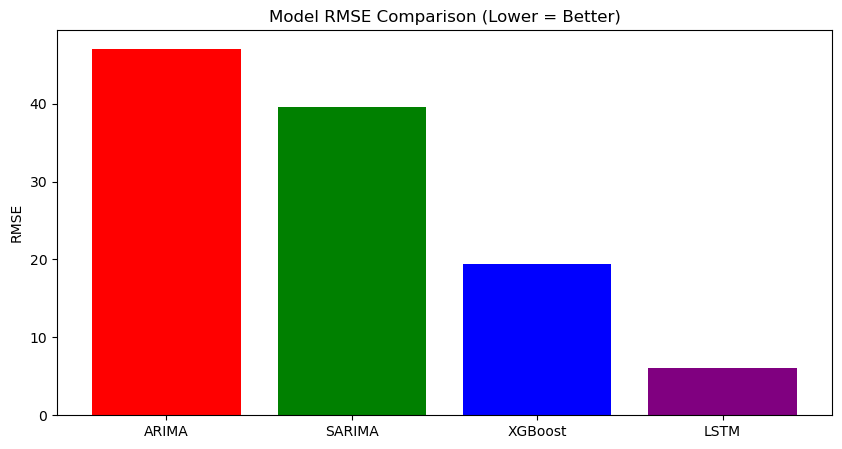

In [6]:
# ----------------------------------------------------------
# 🧾 STEP 7: MODEL COMPARISON TABLE (FINAL TABULAR COLUMN)
# ----------------------------------------------------------

# Combine all model metrics into one DataFrame
results_df = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMA', 'XGBoost', 'LSTM'],
    'MSE': [mse_arima, mse_sarima, mse_xgb, mse_lstm],
    'MAE': [mae_arima, mae_sarima, mae_xgb, mae_lstm],
    'RMSE': [rmse_arima, rmse_sarima, rmse_xgb, rmse_lstm],
    'R²': [r2_arima, r2_sarima, r2_xgb, r2_lstm]
}).round(4)

# Display tabular comparison neatly
print("\n📊 MODEL PERFORMANCE COMPARISON\n")
from tabulate import tabulate
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False))

# Identify Best Model
best_model = results_df.loc[results_df['RMSE'].idxmin(), 'Model']
print(f"\n🏆 BEST MODEL BASED ON LOWEST RMSE: {best_model}")

# Visualization
plt.figure(figsize=(10,5))
plt.bar(results_df['Model'], results_df['RMSE'], color=['red','green','blue','purple'])
plt.title('Model RMSE Comparison (Lower = Better)')
plt.ylabel('RMSE')
plt.show()
